## Exploring what types of films are currently doing the best at the box office

- year of release(current)> 2020 bom 
- Movie gross tn
- MOVIE title bom
- movie ratings imdb
- rating rt
- genre rt
- rating_review rt_r



In [1]:
# import relevant datasets

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3

conn = sqlite3.connect('data/im.db')

%matplotlib inline


BOX OFFICE MOJO 
COLUMNS = **title | studio |domestic_gross |	foreign_gross |	year**

In [2]:
bom = pd.read_csv('data/bom.movie_gross.csv')
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [4]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### THE NUMBERS
COLS : release_date |	movie |	production_budget |	domestic_gross |	worldwide_gross

In [5]:
tn = pd.read_csv('data/tn.movie_budgets.csv')
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
tn.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [7]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
tn = tn.rename(columns={'movie': 'title'})


In [9]:
# merge tn and bom
pd.merge(tn, bom, on='title', how='inner')

## upon merging the number of rows are reduced. 

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",BV,678800000.0,"1,369.5",2018
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",Sony,200100000.0,680600000,2015
...,...,...,...,...,...,...,...,...,...,...
1242,68,"Apr 27, 2012",Sound of My Voice,"$135,000","$408,015","$429,448",FoxS,408000.0,NaN,2012
1243,73,"Jun 15, 2012",Your Sister's Sister,"$120,000","$1,597,486","$3,090,593",IFC,1600000.0,NaN,2012
1244,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",WB (NL),22800000.0,20200000,2015
1245,86,"Jul 7, 2017",A Ghost Story,"$100,000","$1,594,798","$2,769,782",A24,1600000.0,NaN,2017


* BOM and TN have the same information.

* BOM has 3387 entries and has missing values while TN has 0 null and 5782 entries. 

- Opted for **TN**

### IMDB
TABLES :
   movie_basics |
	directors |
	known_for |
	movie_akas |
	movie_ratings |
	persons |
	principals |
	writers |

In [10]:
pd.read_sql(\
    """
    SELECT *
    FROM sqlite_master 
     
     """
    
    
    , conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [11]:
pd.read_sql(\
    """
    SELECT *
    FROM movie_basics 
     
     """
    
    
    , conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [12]:
pd.read_sql(\
    """
    SELECT *
    FROM movie_ratings 
     
     """
    
    
    , conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [13]:
imdb = pd.read_sql(\
    """
    SELECT *
    FROM movie_basics
    JOIN movie_ratings 
        USING(movie_id) 
     
     """
    
    
    , conn)
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [14]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [15]:
imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

- runtime_minutes has 7620 of 73856 missing values. Less than 10% of the data. Drop missing rows
- genres has 804 of 73856 missing values. Less than 2% of the data. Drop missing rows

In [16]:
# drop missing values in runtime and genres
imdb = imdb.dropna()
imdb.info()

## No missing values. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [17]:
conn.close()

### ROTTEN TOMATOES MOVIE INFO

COLS: id |	synopsis |	rating |	genre |	director |	writer |   theater_date |	dvd_date |	currency |	box_office |	runtime	studio

### REVIEWS 


COLS =id |	review | rating |	fresh |	critic |	top_critic | publisher | date

In [18]:
rt = pd.read_csv('data/rt.movie_info.tsv', sep='\t')
rt.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [19]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


- Rotten Tomato movie_info has very few entries compared to imdb. The preferred cols, genre and run_time have very few rows compared to imdb

In [20]:
rt_review = pd.read_csv("data/rt.reviews.tsv", sep='\t', encoding='windows-1252')
rt_review

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [21]:
rt_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


- Merge rotten tomatoes movie_info with reviews.

In [22]:
rt_merged = pd.merge(rt, rt_review, on='id', how='inner')
rt_merged.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [23]:
rt_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   synopsis      54300 non-null  object
 2   rating_x      54346 non-null  object
 3   genre         54345 non-null  object
 4   director      48992 non-null  object
 5   writer        45206 non-null  object
 6   theater_date  53206 non-null  object
 7   dvd_date      53206 non-null  object
 8   currency      33310 non-null  object
 9   box_office    33310 non-null  object
 10  runtime       53594 non-null  object
 11  studio        40125 non-null  object
 12  review        48869 non-null  object
 13  rating_y      40915 non-null  object
 14  fresh         54432 non-null  object
 15  critic        51710 non-null  object
 16  top_critic    54432 non-null  int64 
 17  publisher     54123 non-null  object
 18  date          54432 non-null  object
dtypes: i

In [24]:
rt_merged.isna().sum()

id                  0
synopsis          132
rating_x           86
genre              87
director         5440
writer           9226
theater_date     1226
dvd_date         1226
currency        21122
box_office      21122
runtime           838
studio          14307
review           5563
rating_y        13517
fresh               0
critic           2722
top_critic          0
publisher         309
date                0
dtype: int64

- Columns of interst: rating_x, rating_y, genre, runtime.

In [25]:
col = ['id','rating_x', 'rating_y', 'runtime']
rt_merged[col]

,id,rating_x,rating_y,runtime
0,3,R,3/5,108 minutes
1,3,R,NaN,108 minutes
2,3,R,NaN,108 minutes
3,3,R,NaN,108 minutes
4,3,R,NaN,108 minutes
...,...,...,...,...
54427,2000,R,NaN,94 minutes
54428,2000,R,1/5,94 minutes
54429,2000,R,2/5,94 minutes
54430,2000,R,2.5/5,94 minutes


### THE MOVIEDB
COLS : genre_ids |	id |	original_language |	original_title |	popularity |	release_date |	title |	vote_average |	vote_count

In [26]:
tmdb = pd.read_csv('data/tmdb.movies.csv', index_col=0)
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [27]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [28]:
tmdb.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

- From the Movie db, drop genre_ids 

In [29]:
tmdb = tmdb.drop(columns='genre_ids')


In [30]:
# tmdb, imdb, tn - use tn later 
it_merged = pd.merge(imdb, tmdb, on='original_title', how='inner')
it_merged

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,original_language,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,116977,en,4.705,2013-05-07,Foodfight!,2.1,46
2,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,323498,en,0.877,2013-08-11,Return to Babylon,7.0,1
3,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,112074,en,1.206,2010-01-01,Life's a Beach,3.2,3
4,tt2246813,Life's a Beach,Life's a Beach,2014,53.0,"Biography,Documentary,Drama",7.4,14,112074,en,1.206,2010-01-01,Life's a Beach,3.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17342,tt9595506,So Pretty,So Pretty,2019,83.0,Drama,5.3,15,201725,en,0.600,2012-08-29,So Pretty,6.0,1
17343,tt9598566,Ave Maria,Ave Maria,2018,74.0,Drama,7.3,30,444182,en,0.600,2015-08-19,Ave Maria,10.0,1
17344,tt9600932,The Brink,The Brink,2019,91.0,Documentary,6.2,107,361995,en,0.600,2015-08-07,The Brink,8.0,1
17345,tt9647790,Celia,Celia,2018,100.0,Documentary,8.2,8,334204,en,1.400,2012-10-26,Celia,5.7,3


In [31]:
it_merged.isna().sum()

movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
id                   0
original_language    0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [32]:
# get average of ratings from imdb and tmdb 
# add the vote counts
it_merged['avg_rating'] = (it_merged['averagerating'] + it_merged['vote_average'])/2
it_merged['num_votes'] = it_merged['numvotes'] +  it_merged['vote_count']

# get release year from release date
it_merged['release_year'] = pd.to_datetime(it_merged['release_date']).dt.year

it_merged

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,original_language,popularity,release_date,title,vote_average,vote_count,avg_rating,num_votes,release_year
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64,6.95,4581,2018
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,116977,en,4.705,2013-05-07,Foodfight!,2.1,46,2.00,8294,2013
2,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,323498,en,0.877,2013-08-11,Return to Babylon,7.0,1,6.45,124,2013
3,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,112074,en,1.206,2010-01-01,Life's a Beach,3.2,3,3.55,222,2010
4,tt2246813,Life's a Beach,Life's a Beach,2014,53.0,"Biography,Documentary,Drama",7.4,14,112074,en,1.206,2010-01-01,Life's a Beach,3.2,3,5.30,17,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17342,tt9595506,So Pretty,So Pretty,2019,83.0,Drama,5.3,15,201725,en,0.600,2012-08-29,So Pretty,6.0,1,5.65,16,2012
17343,tt9598566,Ave Maria,Ave Maria,2018,74.0,Drama,7.3,30,444182,en,0.600,2015-08-19,Ave Maria,10.0,1,8.65,31,2015
17344,tt9600932,The Brink,The Brink,2019,91.0,Documentary,6.2,107,361995,en,0.600,2015-08-07,The Brink,8.0,1,7.10,108,2015
17345,tt9647790,Celia,Celia,2018,100.0,Documentary,8.2,8,334204,en,1.400,2012-10-26,Celia,5.7,3,6.95,11,2012


In [33]:
# select the columns to keep.
cols = [
    'primary_title', 'original_title','title',
    'genres', 'original_language', 'runtime_minutes',
    'popularity', 'avg_rating', 'num_votes', 'release_year'
]

In [34]:
it_merged = it_merged[cols]
it_merged

,primary_title,original_title,title,genres,original_language,runtime_minutes,popularity,avg_rating,num_votes,release_year
0,The Other Side of the Wind,The Other Side of the Wind,The Other Side of the Wind,Drama,en,122.0,9.800,6.95,4581,2018
1,Foodfight!,Foodfight!,Foodfight!,"Action,Animation,Comedy",en,91.0,4.705,2.00,8294,2013
2,Return to Babylon,Return to Babylon,Return to Babylon,"Biography,Comedy,Drama",en,75.0,0.877,6.45,124,2013
3,Life's a Beach,Life's a Beach,Life's a Beach,Comedy,en,100.0,1.206,3.55,222,2010
4,Life's a Beach,Life's a Beach,Life's a Beach,"Biography,Documentary,Drama",en,53.0,1.206,5.30,17,2010
...,...,...,...,...,...,...,...,...,...,...
17342,So Pretty,So Pretty,So Pretty,Drama,en,83.0,0.600,5.65,16,2012
17343,Ave Maria,Ave Maria,Ave Maria,Drama,en,74.0,0.600,8.65,31,2015
17344,The Brink,The Brink,The Brink,Documentary,en,91.0,0.600,7.10,108,2015
17345,Celia,Celia,Celia,Documentary,en,100.0,1.400,6.95,11,2012


In [35]:

# rename tn_movie to original_title
tn = tn.rename(columns={'title':'original_title'})

# merge it with tn 
pd.merge(it_merged, tn, on='original_title', how='left')

,primary_title,original_title,title,genres,original_language,runtime_minutes,popularity,avg_rating,num_votes,release_year,id,release_date,production_budget,domestic_gross,worldwide_gross
0,The Other Side of the Wind,The Other Side of the Wind,The Other Side of the Wind,Drama,en,122.0,9.800,6.95,4581,2018,NaN,NaN,NaN,NaN,NaN
1,Foodfight!,Foodfight!,Foodfight!,"Action,Animation,Comedy",en,91.0,4.705,2.00,8294,2013,26.0,"Dec 31, 2012","$45,000,000",$0,"$73,706"
2,Return to Babylon,Return to Babylon,Return to Babylon,"Biography,Comedy,Drama",en,75.0,0.877,6.45,124,2013,NaN,NaN,NaN,NaN,NaN
3,Life's a Beach,Life's a Beach,Life's a Beach,Comedy,en,100.0,1.206,3.55,222,2010,NaN,NaN,NaN,NaN,NaN
4,Life's a Beach,Life's a Beach,Life's a Beach,"Biography,Documentary,Drama",en,53.0,1.206,5.30,17,2010,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17521,So Pretty,So Pretty,So Pretty,Drama,en,83.0,0.600,5.65,16,2012,NaN,NaN,NaN,NaN,NaN
17522,Ave Maria,Ave Maria,Ave Maria,Drama,en,74.0,0.600,8.65,31,2015,NaN,NaN,NaN,NaN,NaN
17523,The Brink,The Brink,The Brink,Documentary,en,91.0,0.600,7.10,108,2015,NaN,NaN,NaN,NaN,NaN
17524,Celia,Celia,Celia,Documentary,en,100.0,1.400,6.95,11,2012,NaN,NaN,NaN,NaN,NaN


### UNIVARIATE ANALYSIS

In [36]:
# top 10 genres
it_merged['genres'].value_counts()[:10]


Drama                   1827
Documentary             1616
Horror                   770
Comedy                   754
Comedy,Drama             623
Horror,Thriller          528
Thriller                 432
Comedy,Drama,Romance     429
Drama,Romance            405
Drama,Thriller           379
Name: genres, dtype: int64

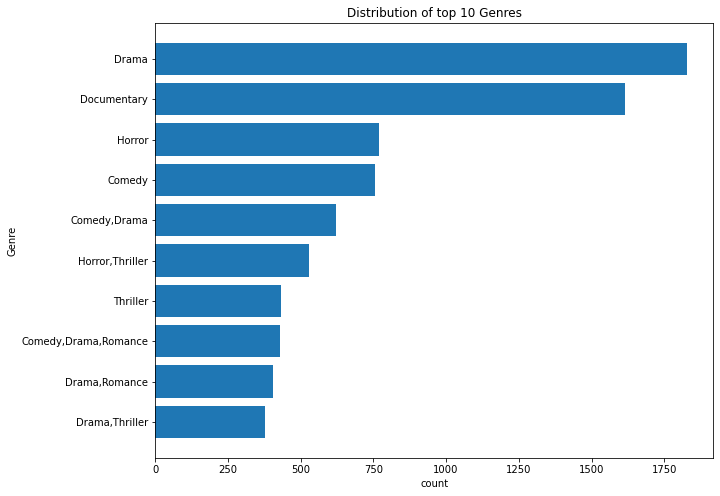

In [41]:
fig, ax = plt.subplots(figsize=(10,8))

#x
x = it_merged['genres'].value_counts()[:10].index
#y
y = it_merged['genres'].value_counts()[:10].values


ax.barh(x,y)
ax.set_xlabel('count')
ax.set_ylabel('Genre')
ax.set_title('Distribution of top 10 Genres')
ax.invert_yaxis();

In [38]:
# languages used in films
top5_lang = it_merged['original_language'].value_counts()[:5]

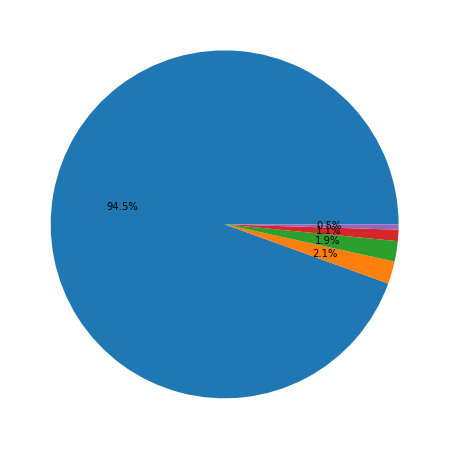

In [39]:
fig, ax = plt.subplots(figsize=(10,8))

ax.pie(top5_lang, autopct='%1.1f%%');

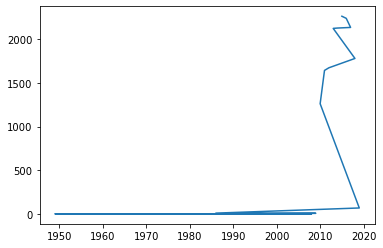

In [40]:
plt.plot(it_merged['release_year'].value_counts().index, it_merged['release_year'].value_counts().values)

### Trend Analysis of Movie Releases Over Time
To analyze how the number of movie releases has changed over the years, particularly focusing on recent trends (e.g., post-2020). This helps in understanding market dynamics and planning future releases.

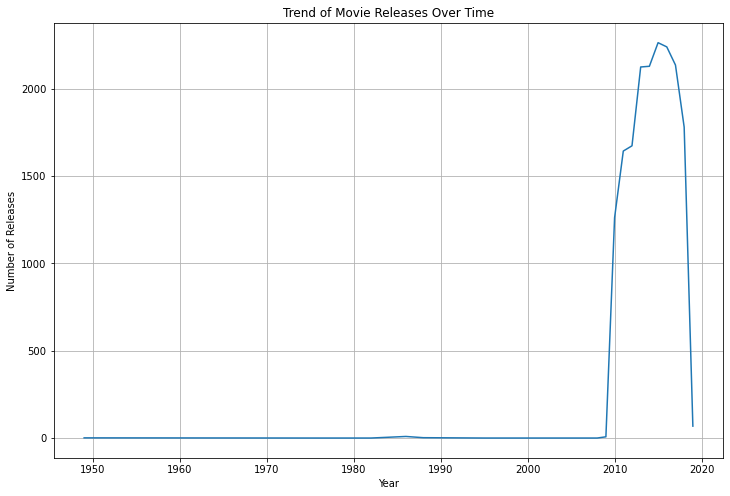

In [49]:
plt.figure(figsize=(12,8))
release_trends = it_merged['release_year'].value_counts().sort_index()
sns.lineplot(x=release_trends.index, y=release_trends.values)
plt.title('Trend of Movie Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

### Top 10 Movies by Worldwide Gross
This visualization highlights the movies that have achieved the highest worldwide gross, indicating their commercial success.

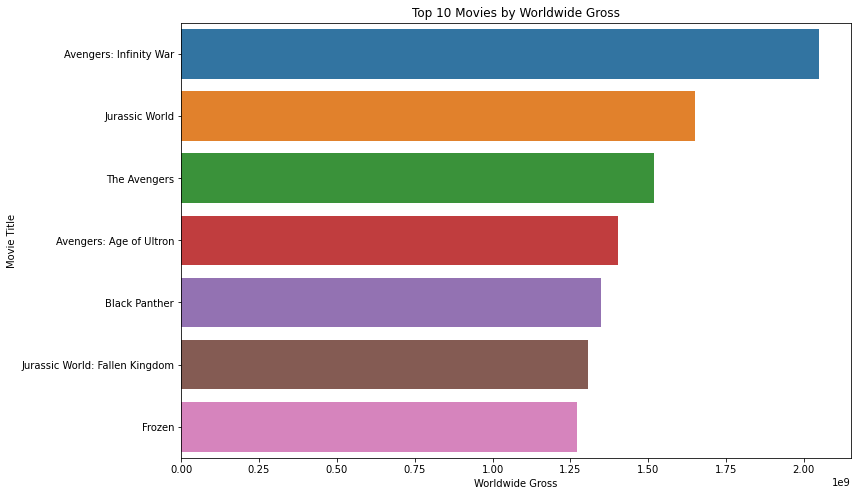

In [52]:
# Ensure 'worldwide_gross' is numeric
tn['worldwide_gross'] = tn['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Merge the datasets to include worldwide gross
merged_data_with_gross = pd.merge(it_merged, tn, on='original_title', how='left')

# Top 10 movies by worldwide gross
top_movies_gross = merged_data_with_gross.sort_values(by='worldwide_gross', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,8))
sns.barplot(x='worldwide_gross', y='primary_title', data=top_movies_gross)
plt.title('Top 10 Movies by Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Movie Title')
plt.show()

### Average Rating vs. Popularity
This visualization explores the relationship between the average rating of movies and their popularity, which can indicate the correlation between quality and audience interest.

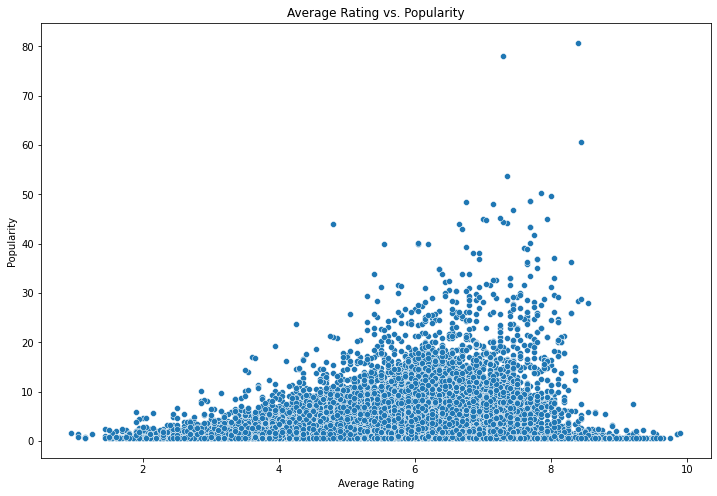

In [53]:
# Scatter plot of average rating vs. popularity
plt.figure(figsize=(12,8))
sns.scatterplot(x='avg_rating', y='popularity', data=it_merged)
plt.title('Average Rating vs. Popularity')
plt.xlabel('Average Rating')
plt.ylabel('Popularity')
plt.show()